<a href="https://colab.research.google.com/github/Karthikeyan-Muthusubramanian/TSP_GA/blob/main/Solving_the_Travelling_salesman_problem_using_Genetic_Algorithm_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np, random,math
import pandas as pd
from google.colab import output
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 500

## **The Problem**

**Travelling salesman problem.**

The problem is described as below:

*“Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?”*

Important rules:
1.   Each city needs to be visited exactly one time
2.   We must return to the starting city, so our total distance needs to be calculated accordingly

Genetic algorithm focuses on finding optimal solutions by implementing the theory of natural selection and evolution. In the travelling salesman problem, we will have to find the best possible route for the salesman to cover with least possible distance.

In order to obtain this, we will need to:\
  a)identify the route as per the rule of the problem a.k.a chromosome\
  b)calculate the distance which is the fitness and \
  c)identify all possible routes to acheive the optimum route which is the natural selection and evolution process that is iterative in nature.

Genetic Algorithms follows the below steps in formulating solution for any given problem.

1) Create initial population\
2) Determine the fitness\
3) Select parents\
4) Create children\
5) Mutate\
6) Repeat

In order to find the optimum solution, we need to find the best chromosome (route) with highest fitness (least distance).




## **The problem and the cost function**

**Step1: Create Initial populatiion**

In order to create our initial population, we need a gene and a unique chromosome. In our case a city is a gene and the route created by multiple cities is the chromosome. We then make sure that the routes do not repeat.

# **Creating the Gene (City)**

We create a clas for the City. This class handles the functionalities of creating cities and calculating distance between them

In [79]:
class city:
  city_df=pd.DataFrame()
  distance=0
  def __init__(self):
    dtypes=np.dtype(
      [
        ("CityID",int),
        ("CityName",str),
        ("Latitude",int),
        ("Longitude",int),
      ]
    )
    self.city_df=pd.DataFrame(np.empty(0,dtype=dtypes))

  def createCities(self,city_cnt):
    for i in range(0,city_cnt):
      city="City"+ str(i)
      x=int(random.random() * 200)
      y=int(random.random() * 200)
      df1=pd.DataFrame(data=[[str(i),city,x,y]],columns=["CityID","CityName","Latitude","Longitude"])
      self.city_df=pd.concat([self.city_df,df1],axis=0)

    self.city_df.index=range(len(self.city_df.index))
    return self.city_df
  
  def getDistance(self,originCityIdx,destCityIdx):
    distance=0
  
    x1=self.city_df['Latitude'].iat[originCityIdx]
    y1=self.city_df['Longitude'].iat[originCityIdx]

    x2=self.city_df['Latitude'].iat[destCityIdx]
    y2=self.city_df['Longitude'].iat[destCityIdx]
    
    xDis=abs(x1 - x2)
    yDis=abs(y1 - y2)

    distance=np.sqrt((xDis **2) + (yDis **2))

    return distance

    

## **Creating chromosome (Route)**

We create a class for Route. This class handles functions like creating routes and calculating the total distance of the route


In [103]:
class route:
  route_df=pd.DataFrame()
  routeList=[]
  routeID=0
  distance=0
  totalDistance=0

  def __init__(self,clsCity):
    dtypes=np.dtype(
      [
        ("RouteID",int),
        ("Route",str),
        ("Distance",float),
      ]
    )
    self.route_df=pd.DataFrame(np.empty(0,dtype=dtypes))
    self.mycity=clsCity
    self.routeList=[]
    self.routeID=0

  def calcDistance(self,rtStr):
    myRoute=rtStr.split(",")
    for i in range(0,len(myRoute)-1):
      c1=int(myRoute[i])
      c2=int(myRoute[i+1])
      self.distance +=self.mycity.getDistance(c1,c2)
    
    return self.distance

  def createRoute(self):
    temp_df=self.mycity.city_df['CityID'].tail(-1)
    tmp=temp_df.tolist()
    np.random.shuffle(tmp)
    origin=self.mycity.city_df['CityID'].head(1).to_string(index=False)
    tstr=','.join(str(e) for e in tmp)
    tstr=origin+","+tstr+","+origin
    
    if len(self.routeList)>0:
      for i in range(0,len(self.routeList)):
        if tstr==self.routeList(i):
          createRoute(clsCity)
        else:
          self.routeList.append(tstr)
          
    self.routeID = self.routeID+1
    self.distance=0
    totalDistance=self.calcDistance(tstr)
    
    df=pd.DataFrame(data=[[str(self.routeID),tstr,totalDistance]],columns=["RouteID","Route","Distance"])

    self.route_df=pd.concat([self.route_df,df],axis=0)

    return self.route_df
    #return cities   

## **Create a class to handle generations.**

This class handles functions like creating parents, creating children and mutating the population 

In [129]:
class generation:
  parents=[]
  children=[]
  mutatedPop = []

  def __init__(self):
    self.parents=[]
    self.children=[]
    self.clsGenetic=genetic()
    self.mutatedPop = []

  def createParents(self,routes_ranked_df,retention_rate):
    total_routes=len(routes_ranked_df.index)
    retention_count=int(total_routes*retention_rate)
    self.parents=[]
    temp=[]
    retained=[]
    for i in range(0,retention_count):
      rtStr=routes_ranked_df['Route'].iloc[i]
      retained.append(rtStr)

    for i in range(retention_count,total_routes):
        rtStr=routes_ranked_df['Route'].iloc[i]
        temp.append(rtStr)

    self.parents = retained + temp

    np.random.shuffle(self.parents)

    return self.parents

  def createChildren(self,retention_rate):
    parent_lst=self.parents
    retention_cnt=int((len(parent_lst)+1)*retention_rate)
    
    childSize=len(parent_lst)-retention_cnt
    self.children=[]

    for i in range(0,retention_cnt):
      self.children.append(parent_lst[i])

    for i in range(0,childSize):
      parent1=parent_lst[i]
      parent2=parent_lst[len(parent_lst)-i-1]

      after_cross=self.clsGenetic.crossover(parent1,parent2)

      self.children.append(after_cross)

    return self.children

  def mutatePopulation(self, mutationRate):
    population=self.children
    #this functions runs the mutation algorithm over the population
    self.mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = self.clsGenetic.mutate(population[ind], mutationRate)
        
        self.mutatedPop.append(mutatedInd)

    return self.mutatedPop  



## **Create a class to handle the genetic functions**

This class handles the genetic functions like crossover and mutation

In [136]:
class genetic():
  def __init__(self):
    self.index1=0
    self.index2=0
    self.childStr=''
    self.mutated=''
    self.mutated_ind=[]
    
  def choose_different_indices(self,max_value):
    self.index1 = np.random.randint(1,max_value)
    self.index2 = np.random.randint(1,max_value)
    if self.index1 == self.index2:
      self.choose_different_indices(max_value)
    return self.index1, self.index2

  def crossover(self,strP1,strP2):
    child=[]
    c1=[]
    c2=[]

    p1=list(strP1.split(",")) 
    p2=list(strP2.split(","))

    p1=p1[1:-1]#remove the first and last item from the route as they our start and end points
    p2=p2[1:-1] #remove the first and last item from the route as they our start and end points

    start_pos=random.randint(1,len(p1))
    end_pos=random.randint(1,len(p1))

    for i in range(min(start_pos,end_pos),max(start_pos,end_pos)):
      c1.append(p1[i])

    c2=[item for item in p2 if item not in c1]

    child.append(strP1[0])
    child.extend(c1)
    child.extend(c2)
    child.append(strP1[0])
    self.childStr=','.join(map(str,child))

    return self.childStr

  def mutate(self,individual, mutationRate):
    #this function mutates an individual which is route in our case
    
    ind1=individual.split(",")
    ind1=ind1[1:-1]
    no_of_swaps=math.ceil(len(ind1)*mutationRate) #determine the number of cities to be swapped
    swap_cnt=0
    self.mutated_ind=[]

    while swap_cnt <=no_of_swaps:
      swap_from,swap_to=self.choose_different_indices(len(ind1)) #choose the positions to swap
      swap_to_city=ind1[swap_to]                            #choose the city to be swaped
      swap_from_city=ind1[swap_from]                        #choose the city to swaped from
      ind1[swap_to]=swap_from_city
      ind1[swap_from]=swap_to_city

      swap_cnt=swap_cnt+1                                  #counter to identify the no of swap instances

    self.mutated_ind.append(0)
    self.mutated_ind.extend(ind1)
    self.mutated_ind.append(0)

    self.mutated=','.join(map(str,self.mutated_ind))
    
    return self.mutated



# **Initial population**

In [84]:
def init_population(params,city):
  pop=pd.DataFrame()
  popSize=params.number_in_population

  rt=route(city)
  for i in range(0,popSize):
    rt.createRoute()
  
  pop=rt.route_df

  return pop

# **Create Generations**

In [151]:
def createGenerations(currentGen, carry_fwd_rate, mutationRate):

  clsGen=generation()

  rankedroutes=currentGen.sort_values(['Distance'],ascending=True)
  
  if len(rankedroutes.index)>0:
    parents=clsGen.createParents(rankedroutes,carry_fwd_rate)
    children=clsGen.createChildren(carry_fwd_rate)
    gen=clsGen.mutatePopulation(mutationRate)

  return gen  

In [155]:
def updatePop(gen,clsCity):
  rt=route(clsCity)
  nextGen=pd.DataFrame()

  for i in range(0,len(gen)):
      routeStr=gen[i]
      
      distance=rt.calcDistance(routeStr)
      
      df1=pd.DataFrame(data=[[str(i),routeStr,distance]],columns=["RouteID","Route","Distance"])
      
      nextGen=pd.concat([nextGen,df1],axis=0)

  nextGen.index=range(len(nextGen.index))
    
  return nextGen

# **Approach and justification**


> The First city in the list is considered to be the origination point. The route is constructed from the 2nd city for the number of cities and the fist city is added to both ends of the route to facilitate calculation of distance from origination then to other cities and back to origination.

> Distance between 2 cities is calcuated using pythogorean theorm assuming that they are on a 2D coordinate plane.

> City data is stored as Dataframes. This was to facilitate the usage of external dataset if required.

> Route and Best route in the generation are all stored in DataFrames to enable easy view of the dataset, facilitate debugging and support visualisation.

# **Genetic Algorithm**

In [153]:
def run_genetic(params):

  popSize=params.number_in_population 
  no_of_generations=params.number_of_generations 
  carry_fwd_rate=params.retention_rate 
  mutationRate=params.mutation_rate
  no_of_cities=params.no_of_cities
  
  gen_dtl=pd.DataFrame()

  cityCnt=p.no_of_cities
  cty=city()
  cty.createCities(no_of_cities)

  print("Creating initial population...")
  pop=init_population(params,cty)
  
  pop.sort_values(['Distance'],ascending=True)

  gen_route=pop['Route'].iloc[0]
  gen_distance=pop['Distance'].iloc[0]
  gen_cnt=0
  
  df1=pd.DataFrame(data=[[str(gen_cnt),gen_route,gen_distance]],columns=["GenID","Route","Distance"])
      
  gen_dtl=pd.concat([gen_dtl,df1],axis=0)
  
  display(gen_dtl)

  for i in range(0,no_of_generations):
    output.clear()
    print("Executing for Generation # ",i+1)
    newGen=createGenerations(pop,carry_fwd_rate,mutationRate)
    pop=updatePop(newGen,cty)
    pop.sort_values(['Distance'],ascending=True)
    gen_route=pop['Route'].iloc[0]
    gen_distance=pop['Distance'].iloc[0]
    gen_cnt=i+1
    df1=pd.DataFrame(data=[[str(gen_cnt),gen_route,gen_distance]],columns=["GenID","Route","Distance"])
    gen_dtl=pd.concat([gen_dtl,df1],axis=0)
    output.clear()
  
  return gen_dtl  

# **Output the results from the Genetic Algorithm**

In [139]:
def output_results(final_df,params):
  
  print(" Parameters :\n No of Cities:",params.no_of_cities,"\n Population Size:",params.number_in_population, \
        "\n Carry Forward Rate:",params.retention_rate,"\n Mutation Rate:",params.mutation_rate,"\n No of Generations:",params.number_of_generations,"\n")

  initDistance=final_df['Distance'].head(1).to_string(index=False)
  initRoute=final_df['Route'].head(1).to_string(index=False)

  finalDistance=final_df['Distance'].tail(1).to_string(index=False)
  finalRoute=final_df['Route'].tail(1).to_string(index=False)

  gen_df_sorted=final_df.sort_values(['Distance'],ascending=True)
  bestDistance=gen_df_sorted['Distance'].head(1).to_string(index=False)
  bestRoute=gen_df_sorted['Route'].head(1).to_string(index=False)
  bestRouteGenId=gen_df_sorted['GenID'].head(1).to_string(index=False)

  print("Initial Route : ",initRoute, " --> Distance Covered: ",initDistance)
  print("Final Route   : ",finalRoute, " --> Distance Covered: ",finalDistance)
  print("Best Route    : ",bestRoute, " --> Distance Covered: ",bestDistance)
  print("Best Route found in generation :",bestRouteGenId)

# **Function to plot the results**

In [140]:
def plotResults(final_df):
  
  plt_df=final_df[['GenID','Distance']]
  plt_df=plt_df.convert_dtypes()
  plt.plot(plt_df["GenID"], plt_df["Distance"])

  font1 = {'family':'serif','color':'blue','size':15}
  font2 = {'family':'serif','color':'darkred','size':12}

  plt.xlabel('Generation',fontdict=font2)
  plt.ylabel('Distance',fontdict=font2)
  plt.xscale('linear')
  plt.title('Distance travelled by salesman over generations\n',fontdict=font1)
  
  print("\n")
  
  plt.rcParams['figure.figsize'] = (20, 9)

  plt.show()

**Running the genetic algorithm**


> Set Parameters

In [164]:
class parameters:
  def __init__(self):
    self.number_in_population = 100
    self.number_of_generations = 500
    self.retention_rate = 0.2
    self.mutation_rate=0.3
    self.no_of_cities=10
    self.show_graph=True

> Run the genetic algorithm

 Parameters :
 No of Cities: 10 
 Population Size: 10 
 Carry Forward Rate: 0 
 Mutation Rate: 0 
 No of Generations: 50 

Initial Route :  0,8,6,3,7,4,2,1,9,5,0  --> Distance Covered:  983.790169
Final Route   :  0,7,8,9,1,2,4,5,3,6,0  --> Distance Covered:  1316.670085
Best Route    :  0,1,5,9,7,4,6,2,3,8,0  --> Distance Covered:  655.850981
Best Route found in generation : 35




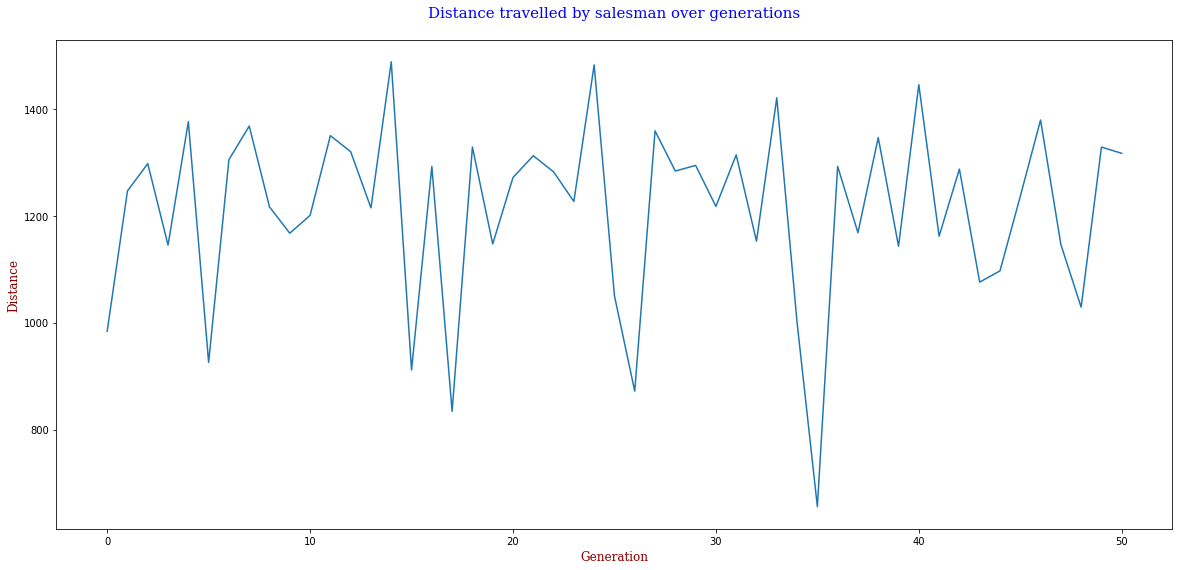

In [160]:
params=parameters()

gen_df=run_genetic(params)

output_results(gen_df,params)

if params.show_graph==True:
  plotResults(gen_df)

 Parameters :
 No of Cities: 10 
 Population Size: 100 
 Carry Forward Rate: 0 
 Mutation Rate: 0 
 No of Generations: 500 

Initial Route :  0,2,1,5,8,3,7,4,9,6,0  --> Distance Covered:  1019.793219
Final Route   :  0,3,7,8,9,6,5,2,4,1,0  --> Distance Covered:  1079.750673
Best Route    :  0,8,6,5,9,1,4,7,3,2,0  --> Distance Covered:  777.049048
Best Route found in generation : 367




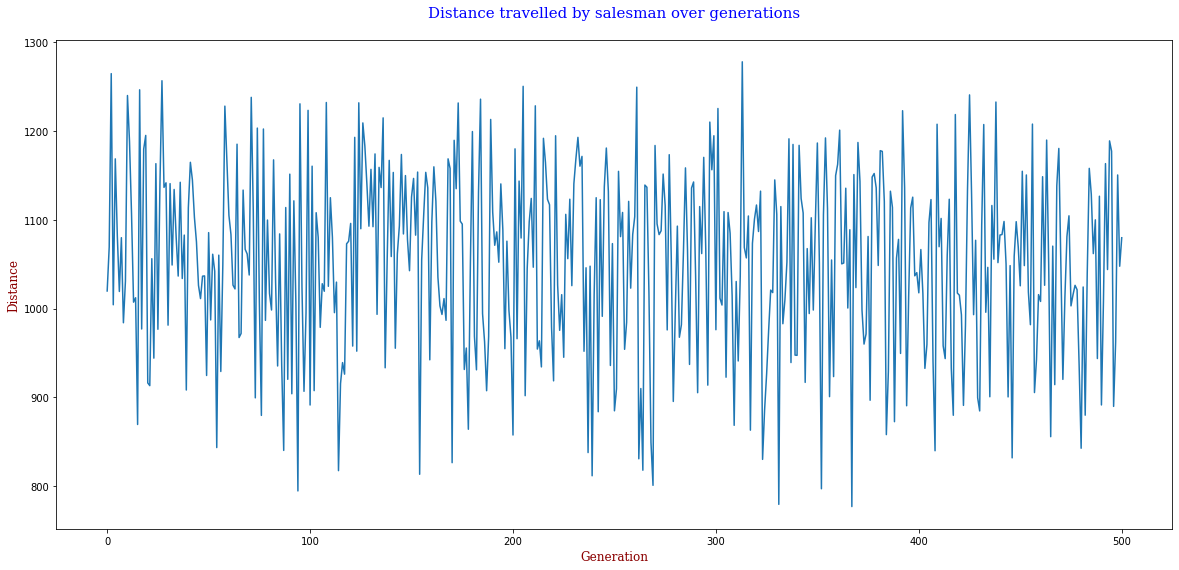

In [163]:
params=parameters()

gen_df=run_genetic(params)

output_results(gen_df,params)

if params.show_graph==True:
  plotResults(gen_df)

 Parameters :
 No of Cities: 10 
 Population Size: 100 
 Carry Forward Rate: 0.2 
 Mutation Rate: 0.3 
 No of Generations: 500 

Initial Route :  0,8,6,4,2,3,1,5,7,9,0  --> Distance Covered:  1187.232631
Final Route   :  0,6,3,5,9,4,2,1,7,8,0  --> Distance Covered:  891.744096
Best Route    :  0,2,6,8,7,5,4,3,1,9,0  --> Distance Covered:  668.544602
Best Route found in generation : 489




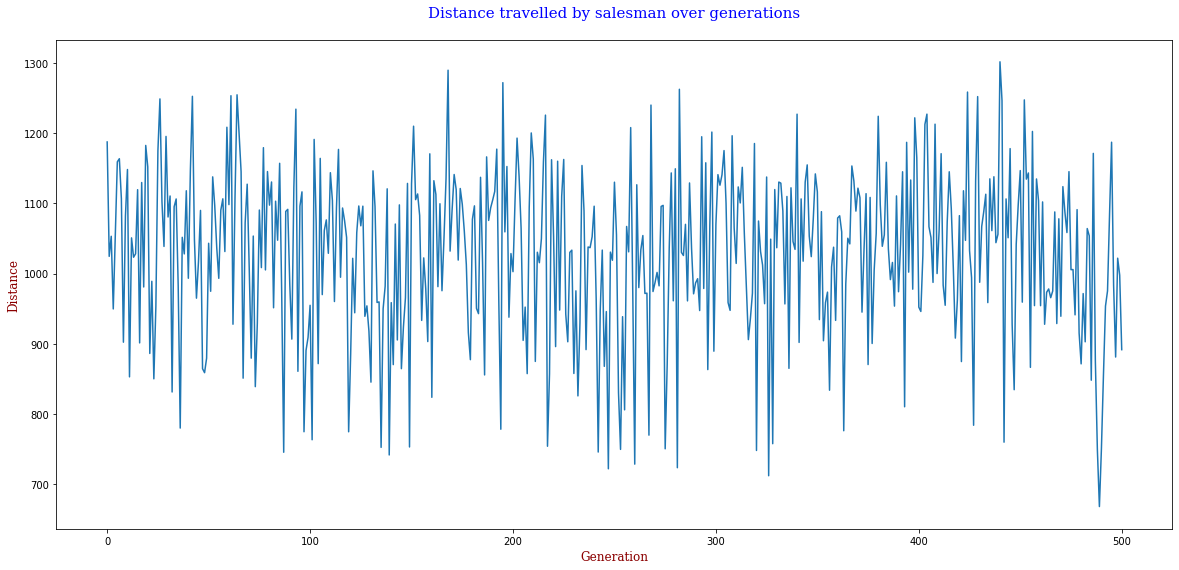

In [165]:
params=parameters()

gen_df=run_genetic(params)

output_results(gen_df,params)

if params.show_graph==True:
  plotResults(gen_df)

# **Results and Conclusions**

In an ideal scenario, the execution of the Genetic Algorithm can be stopped if we have arrived at the expected value of the cost or fitness function. In our current scenario, as we will not be able to determine the the expected value before we start the solution, we continue our execution as per the parameters and run them till the last generation and then find the best route across generations.